In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Reading Data sets of loan

In [2]:
train=pd.read_csv(r'C:\Users\sreejayan\Desktop\virtual competition\train_ctrUa4K.csv')

In [3]:
test=pd.read_csv(r'C:\Users\sreejayan\Desktop\virtual competition\test_lAUu6dG.csv')

In [4]:
sample=pd.read_csv(r'C:\Users\sreejayan\Desktop\virtual competition\sample_submission_49d68Cx.csv')

In [5]:
train_original=train.copy()
test_original=test.copy()

display train data set

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


test data set display

In [7]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [9]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [10]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [11]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [12]:
train.shape

(614, 13)

In [13]:
test.shape

(367, 12)

In [14]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

print proportions

In [15]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

# Exploratory analysis 

<Axes: >

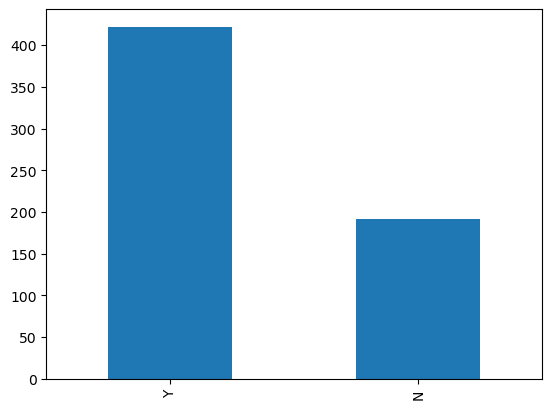

In [16]:
train['Loan_Status'].value_counts().plot.bar()

indipendent variable (categorical)

<Axes: title={'center': 'Credit_History'}>

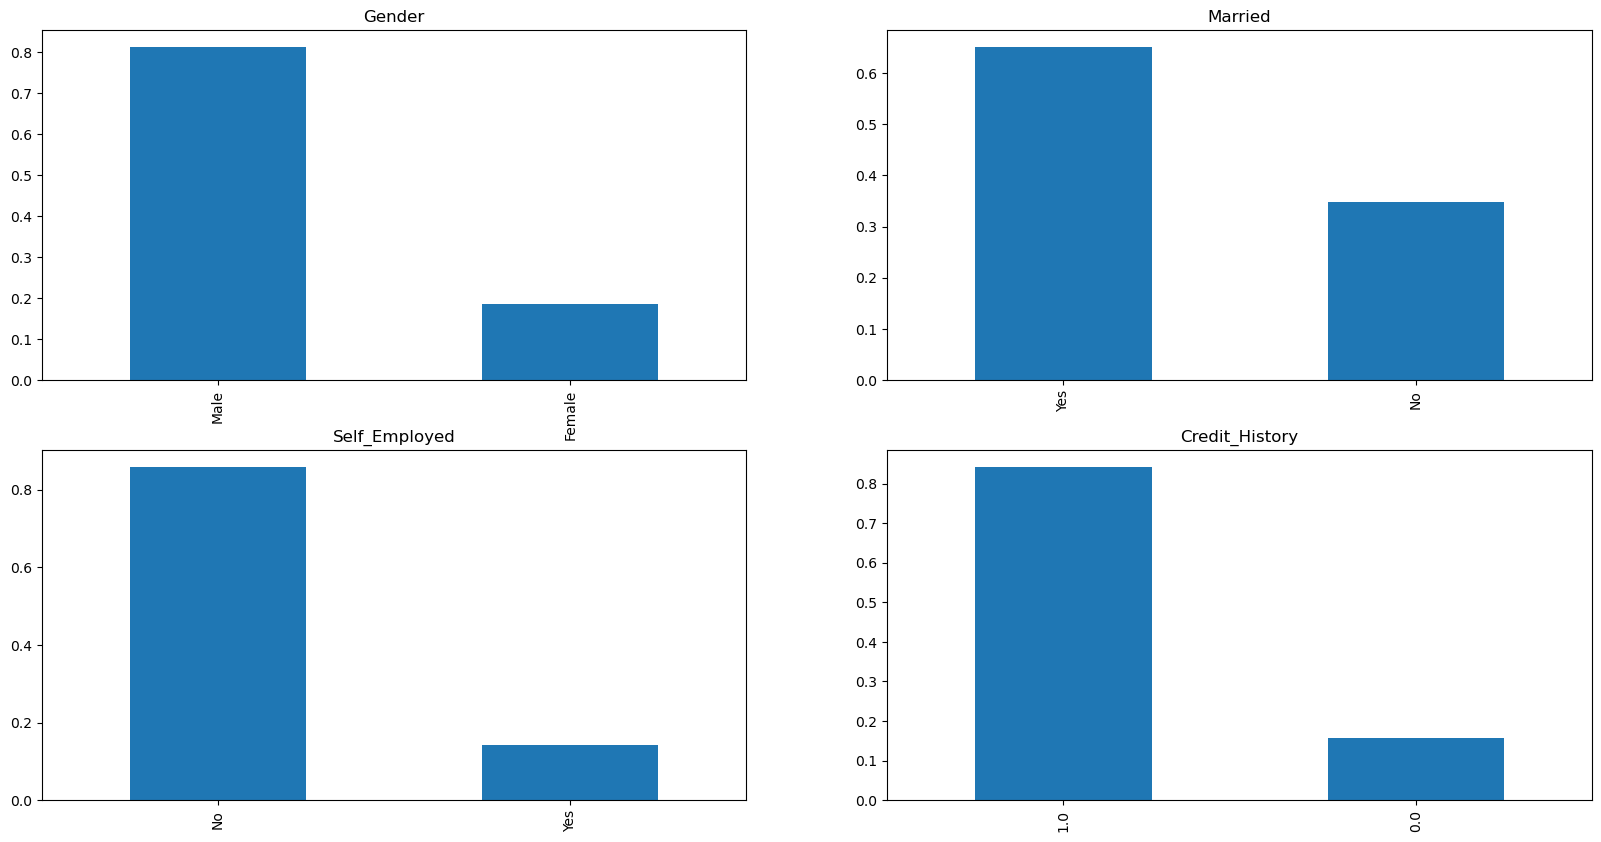

In [17]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')


indipendent variable (ordinal)

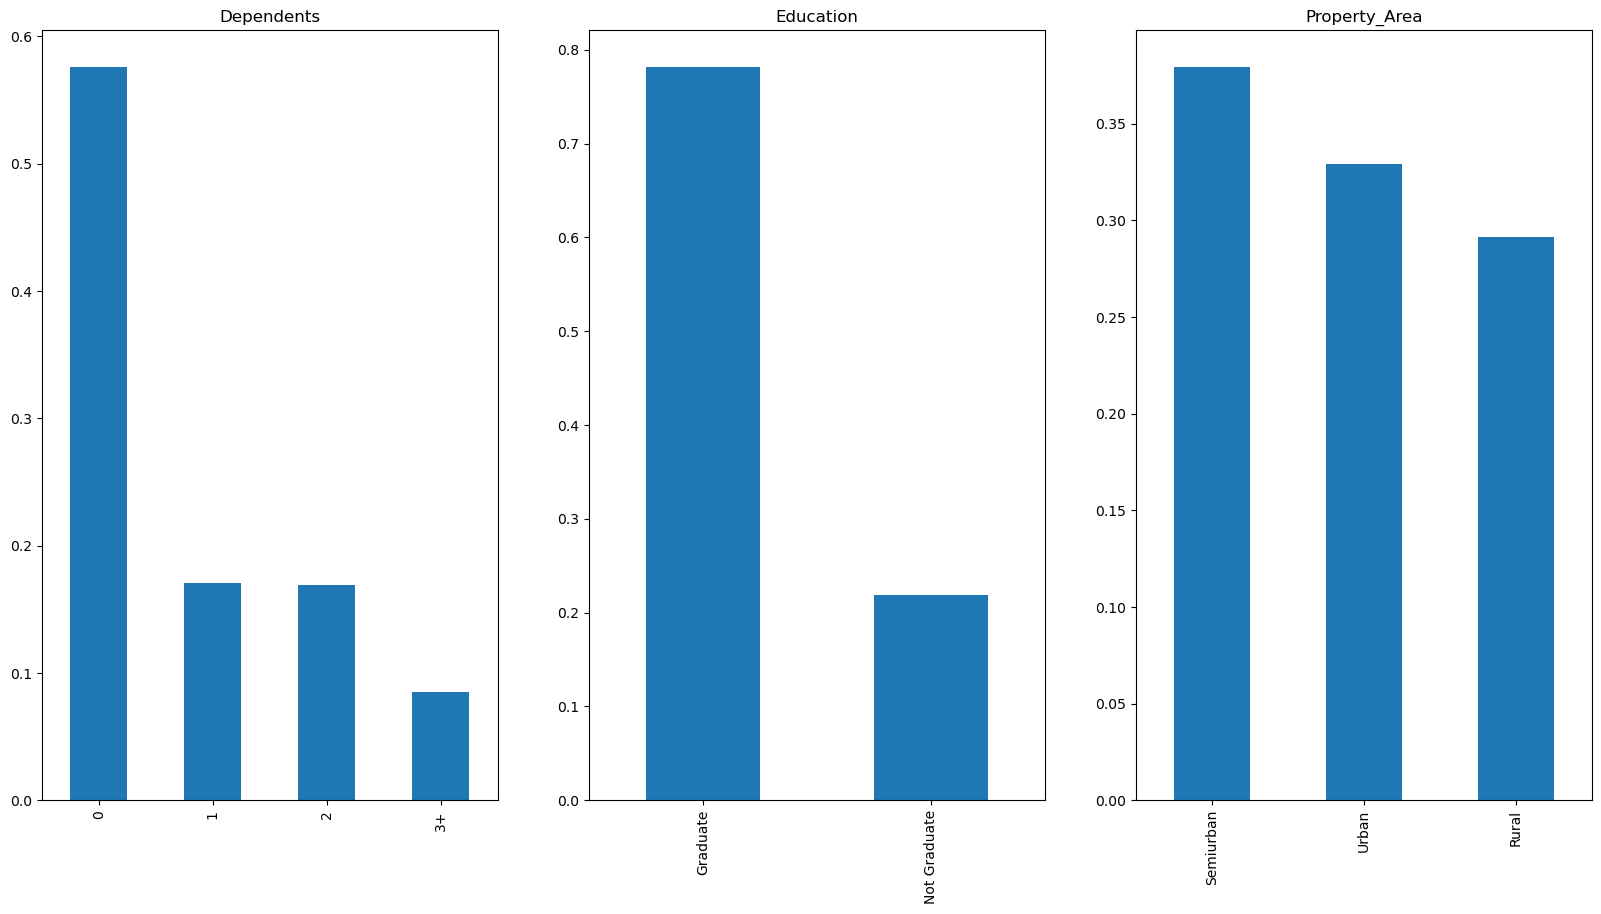

In [18]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()


numerical

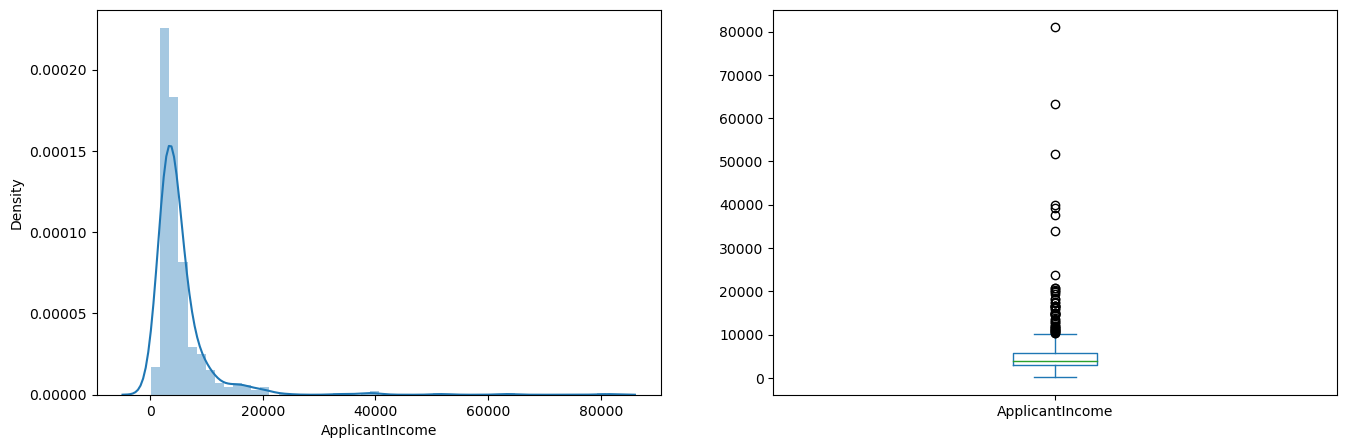

In [19]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']);
plt.subplot(122)    
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()


NameError: name 'Text' is not defined

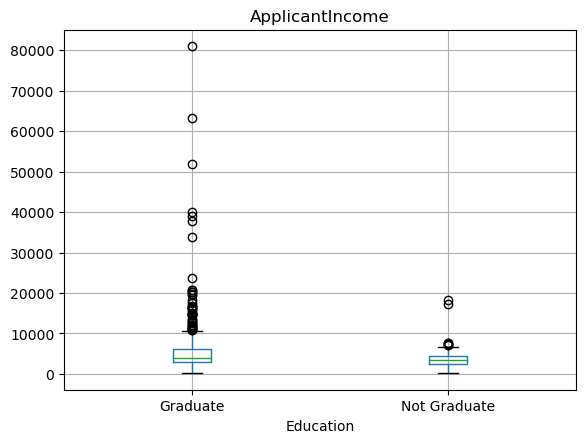

In [20]:
train.boxplot(column='ApplicantIncome', by ='Education')
plt.suptitle("") 
Text(0.5, 0.98,'')

In [21]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
#co applicant income

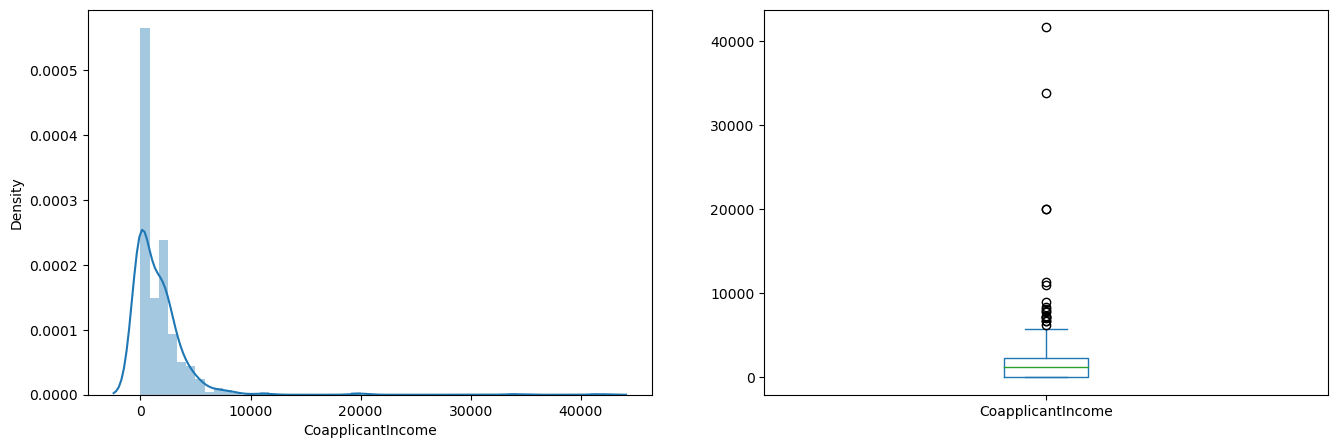

In [23]:
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']);
plt.subplot(122)    
train['CoapplicantIncome'].plot.box(figsize=(16,5))
plt.show()

loan amount variable

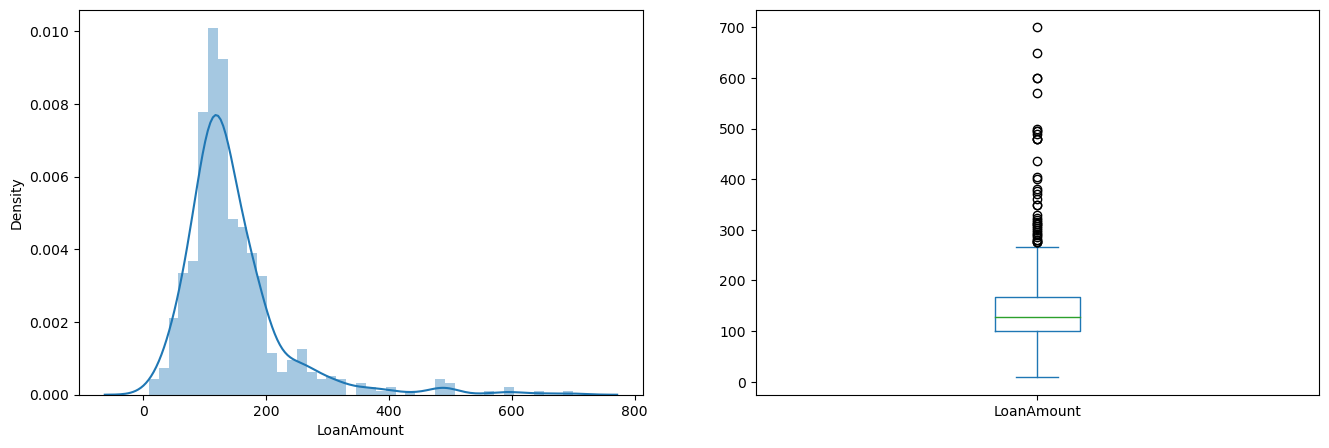

In [24]:
plt.figure(1)
plt.subplot(121) 
df=train.dropna()
sns.distplot(train['LoanAmount']);
plt.subplot(122)    
train['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

bivariate 

categorical vs target variable

<Axes: xlabel='Gender'>

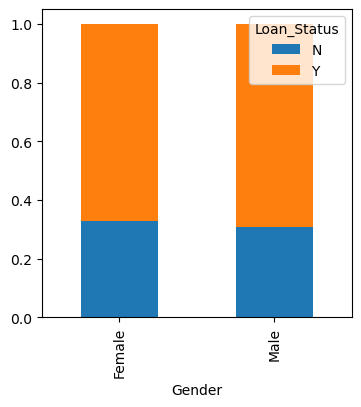

In [25]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",
stacked=True,figsize=(4,4))


<Axes: xlabel='Loan_Status'>

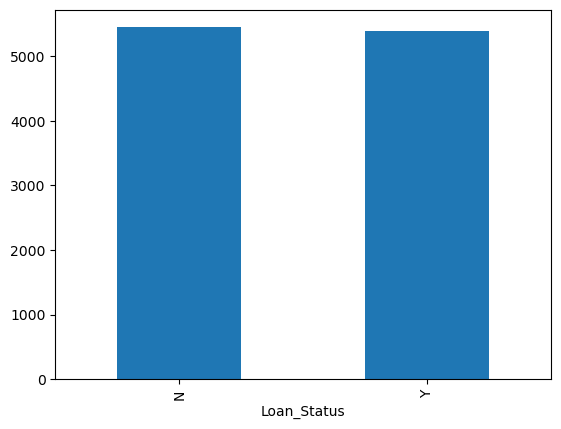

In [26]:
# loan vs aplicant income
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

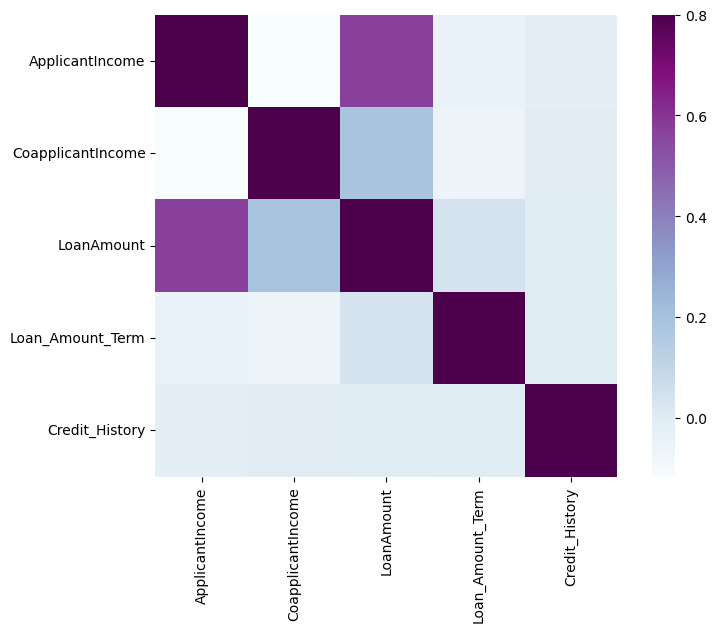

In [27]:
matrix=train.corr()
f, ax=plt.subplots(figsize=(9,6))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu");

Missing value imputation

In [28]:
#pre processing
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [30]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [31]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [32]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [33]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [34]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [36]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [37]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [38]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [39]:
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [45]:
# Perform one-hot encoding on categorical variables
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
train1 = pd.get_dummies(train, columns=categorical_cols, drop_first=True)


In [47]:
# Perform label encoding on ordinal variables
label_encoder = LabelEncoder()
train1['Dependents'] = label_encoder.fit_transform(train_encoded['Dependents'])
train1['Loan_Status'] = label_encoder.fit_transform(train_encoded['Loan_Status'])

In [44]:
# Print the encoded dataset
print(train1.head())

    Loan_ID  Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0  LP001002           0             5849                0.0       128.0   
1  LP001003           1             4583             1508.0       128.0   
2  LP001005           0             3000                0.0        66.0   
3  LP001006           0             2583             2358.0       120.0   
4  LP001008           0             6000                0.0       141.0   

   Loan_Amount_Term  Credit_History  Loan_Status  Gender_Male  Married_Yes  \
0             360.0             1.0            1            1            0   
1             360.0             1.0            0            1            1   
2             360.0             1.0            1            1            1   
3             360.0             1.0            1            1            1   
4             360.0             1.0            1            1            0   

   Education_Not Graduate  Self_Employed_Yes  Property_Area_Semiurban  \
0      

In [48]:
train1.columns

Index(['Loan_ID', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Gender_Male', 'Married_Yes', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

# modelling 

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [55]:
#Split the data into features (X) and target variable (y)
X = train1.drop('Loan_Status', axis=1)  # Features
y = train1['Loan_Status']  # Target variable
X_encoded = pd.get_dummies(X)


In [56]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
#Model Training
model = RandomForestClassifier()
model.fit(X_encoded, y)

RandomForestClassifier()

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [65]:
# Combine train and test data for preprocessing
data = pd.concat([train.drop('Loan_Status', axis=1), test])

# Handle missing values and perform one-hot encoding for categorical variables
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
data_encoded = pd.get_dummies(data)



In [66]:
# Split the data back into train and test sets
X_train = data_encoded[:train.shape[0]]
X_test = data_encoded[train.shape[0]:]
y_train = train['Loan_Status']

In [67]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_estimators': [100, 200, 300],
              'max_depth': [None, 5, 10],
              'min_samples_split': [2, 5, 10]}


In [68]:
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [69]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set
y_pred = best_model.predict(X_test)


In [70]:
# Optional: Evaluate the model's performance using cross-validation
# cv_results = cross_val_score(best_model, X_train, y_train, cv=5)
# mean_cv_accuracy = cv_results.mean()

# Print the best parameters and the mean cross-validation accuracy
print("Best Parameters:", best_params)
# print("Mean Cross-Validation Accuracy:", mean_cv_accuracy)

# Optional: Evaluate the model's performance on the train set
# y_train_pred = best_model.predict(X_train)
# train_accuracy = accuracy_score(y_train, y_train_pred)
# print("Train Accuracy:", train_accuracy)

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}


In [35]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')